In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_b3db_kc = pd.read_csv("b3db_kc_split_descriptors.tsv", sep="\t")
df_train = df_b3db_kc[df_b3db_kc.split == "training"].copy().reset_index(drop=True)

In [20]:
[z for z in list(df_b3db_kc) if "Num" in z] 

['desc2D_NumValenceElectrons',
 'desc2D_NumRadicalElectrons',
 'desc2D_NumAliphaticCarbocycles',
 'desc2D_NumAliphaticHeterocycles',
 'desc2D_NumAliphaticRings',
 'desc2D_NumAromaticCarbocycles',
 'desc2D_NumAromaticHeterocycles',
 'desc2D_NumAromaticRings',
 'desc2D_NumHAcceptors',
 'desc2D_NumHDonors',
 'desc2D_NumHeteroatoms',
 'desc2D_NumRotatableBonds',
 'desc2D_NumSaturatedCarbocycles',
 'desc2D_NumSaturatedHeterocycles',
 'desc2D_NumSaturatedRings',
 'desc2D_NumAtomStereoCenters',
 'desc2D_NumUnspecifiedAtomStereoCenters',
 'desc2D_NumBridgeheadAtoms',
 'desc2D_NumAmideBonds',
 'desc2D_NumSpiroAtoms']

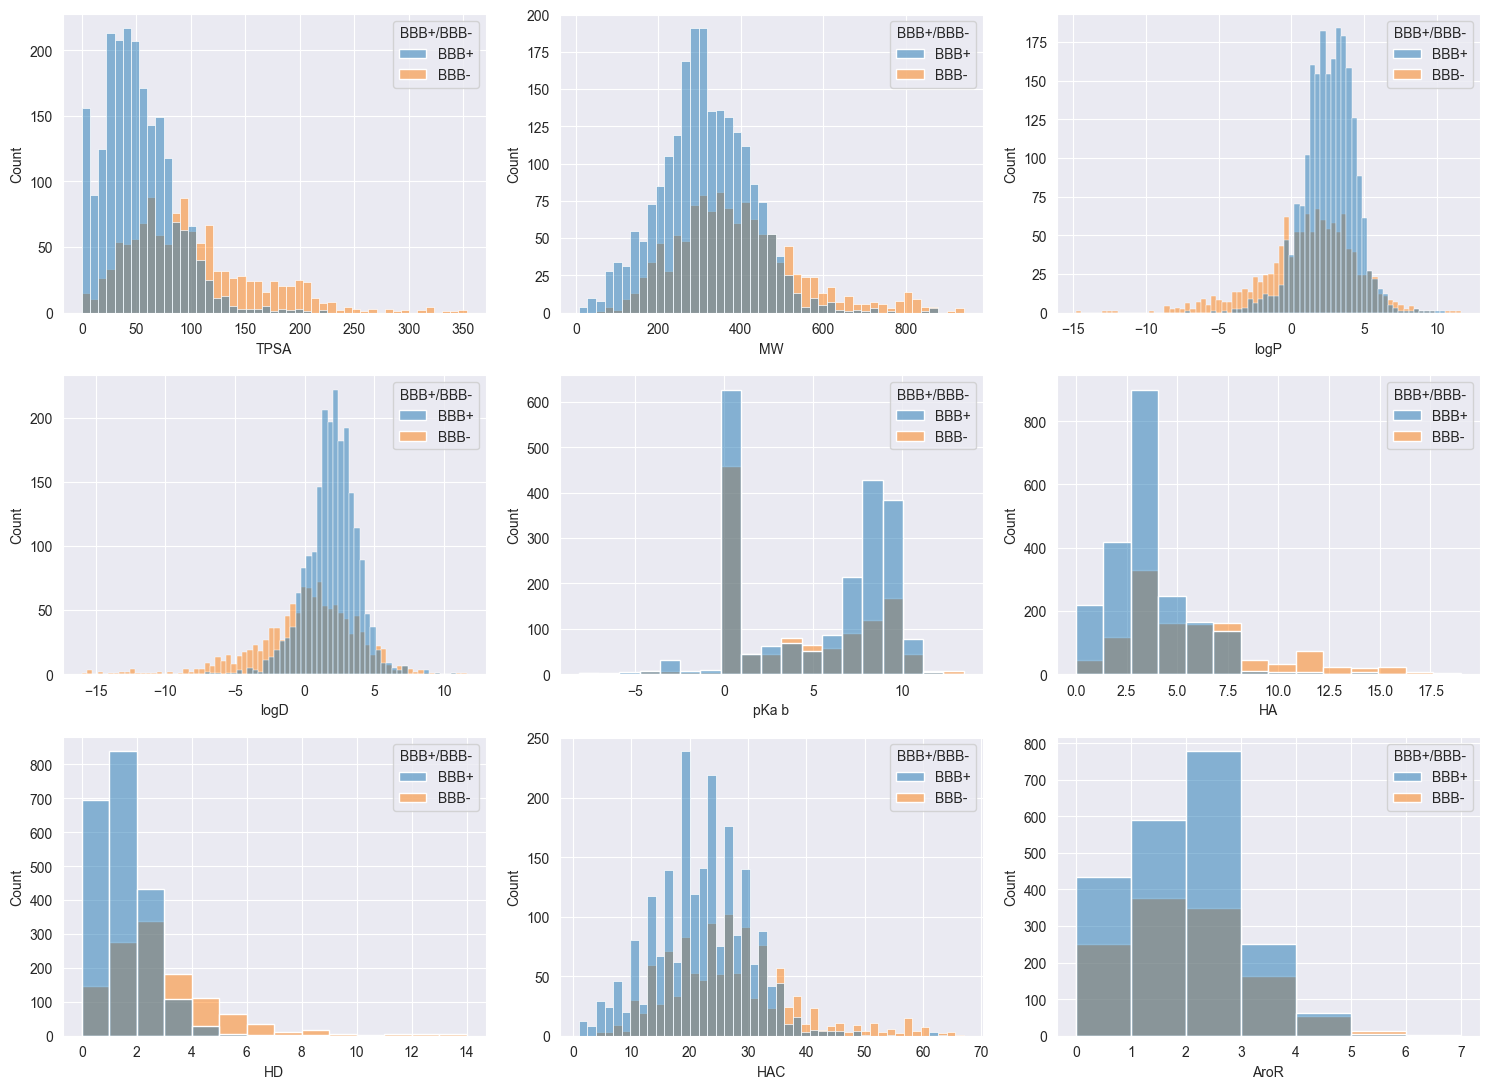

In [60]:
features_of_interest = [
    'desc2D_TPSA',
    'desc2D_MolWt',
    'chemaxon_logp',
    'chemaxon_logd',
    'chemaxon_pka_b',
    'desc2D_NumHAcceptors',
    'desc2D_NumHDonors',
    'desc2D_HeavyAtomCount',
    'desc2D_NumAromaticRings', # for this analysis only
    
    #'desc2D_MinAbsPartialCharge',
    #'desc2D_MaxEStateIndex',
    #'desc2D_MinEStateIndex',
    # 'desc2D_MinPartialCharge',
    # 'desc2D_MaxAbsPartialCharge',
    # 'desc2D_AvgIpc',
    # 'desc2D_HallKierAlpha',
    # 'desc2D_qed',
    # 'desc2D_MinAbsEStateIndex',
    # 'desc2D_NumRotatableBonds',
    # 'desc2D_FractionCSP3',
    # 'desc2D_BalabanJ',
    # 'desc2D_NumSaturatedRings',
    # 'desc2D_NumAliphaticHeterocycles',
    # 'desc2D_NumAliphaticCarbocycles',
    # 'desc2D_NumSpiroAtoms',
    # 'desc2D_NumBridgeheadAtoms',
    # 'desc2D_NumUnspecifiedAtomStereoCenters',
    # 'desc2D_NumAtomStereoCenters',
    # 'desc2D_NumRadicalElectrons',
    # 'desc2D_NumAmideBonds',
    #'desc2D_SPS'
]

f_rename_dict = {
    'desc2D_TPSA': "TPSA",
    'desc2D_MolWt': "MW",
    'chemaxon_logp': "logP",
    'chemaxon_logd': "logD",
    'chemaxon_pka_b': "pKa b",
    'desc2D_NumHAcceptors': "HA",
    'desc2D_NumHDonors': "HD",
    'desc2D_HeavyAtomCount': "HAC",
    'desc2D_NumAromaticRings': "AroR",
}
_df = df_b3db_kc[features_of_interest + ['BBB+/BBB-']].rename(columns=f_rename_dict)

n_cols = 3
n_rows = len(features_of_interest) // n_cols + (len(features_of_interest) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 11), sharex=False, sharey=False)

# Plot each feature's density on a grid
for i, feature in enumerate(features_of_interest):
    row, col = divmod(i, n_cols)
    sns.histplot(data=_df, x=f_rename_dict[feature], hue='BBB+/BBB-', fill=True, ax=axes[row, col], bins=  14 if f_rename_dict[feature] in {"HA", "HD"} else 7 if f_rename_dict[feature] == "AroR"  else "auto")
    #axes[row, col].set_title(f'{feature.split("_", 1)[-1]}')

plt.tight_layout()
# Remove empty subplots if any
for i in range(len(features_of_interest), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Plot the correlation matrix

#sns.pairplot(df_b3db_kc[ features_of_interest + ['BBB+/BBB-']], hue='BBB+/BBB-', markers=["o", "s"])

Text(0.0, 1.0, 'Correlation Matrix')

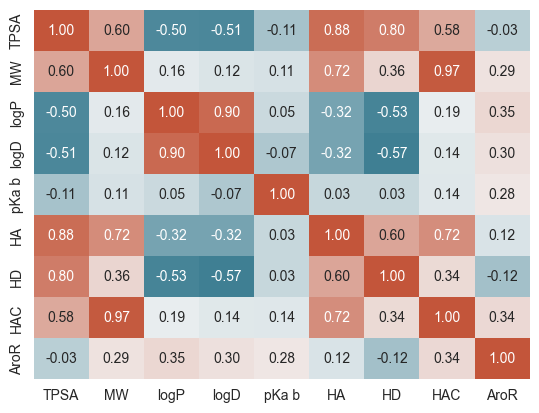

In [53]:
corr_matrix = _df.drop(columns=["BBB+/BBB-"]).corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=False )
axes[-1, 0].set_title('Correlation Matrix', loc='left', fontsize=14)


,desc2D_TPSA,desc2D_MolWt,chemaxon_logp,chemaxon_logd,chemaxon_pka_b,desc2D_NumHAcceptors,desc2D_NumHDonors,desc2D_HeavyAtomCount,desc2D_NumAromaticRings
desc2D_TPSA,1.000000,0.601689,-0.504050,-0.507801,-0.114133,0.882127,0.803706,0.580653,-0.028305
desc2D_MolWt,0.601689,1.000000,0.157213,0.118870,0.105855,0.724100,0.360443,0.971523,0.292823
chemaxon_logp,-0.504050,0.157213,1.000000,0.900184,0.045017,-0.317123,-0.531631,0.185002,0.346345
chemaxon_logd,-0.507801,0.118870,0.900184,1.000000,-0.074873,-0.320567,-0.567341,0.143570,0.304064
chemaxon_pka_b,-0.114133,0.105855,0.045017,-0.074873,1.000000,0.028210,0.031776,0.140349,0.275834
desc2D_NumHAcceptors,0.882127,0.724100,-0.317123,-0.320567,0.028210,1.000000,0.598909,0.715596,0.115985
desc2D_NumHDonors,0.803706,0.360443,-0.531631,-0.567341,0.031776,0.598909,1.000000,0.335385,-0.121482
desc2D_HeavyAtomCount,0.580653,0.971523,0.185002,0.143570,0.140349,0.715596,0.335385,1.000000,0.342702
desc2D_NumAromaticRings,-0.028305,0.292823,0.346345,0.304064,0.275834,0.115985,-0.121482,0.342702,1.000000
